A geometric Brownian motion (GBM) (also known as exponential Brownian motion) is a continuous-time stochastic process in which the logarithm of the randomly varying quantity follows a Brownian motion (also called a Wiener process) with drift.[1] It is an important example of stochastic processes satisfying a stochastic differential equation (SDE); in particular, it is used in mathematical finance to model stock prices in the Black–Scholes model.

$$ log(Y(t)) = X(t) = \mu t + \sigma \beta(t) $$

https://www.pyquantnews.com/the-pyquant-newsletter/how-to-simulate-stock-prices-with-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up parameters for Brownian Motion
s0 = 131.00
sigma = 0.25        # Percentage volatility
mu = 0.35           # Percentage drift

# Setup the simulation
paths = 1000        # Number of price simulations to create
delta = 1.0/252.0   # The increment to downsample sigma
time = 252*5        # Number of samples to create

In [4]:
def wiener_process(delta, sigma, time, paths):
    """Returns a Wiener process
    
    Returns
    -------
    wiener_process : np.ndarray
    
    Notes
    -----
    This method returns a Wiener process. 
    The Wiener process is also called Brownian 
    motion. For more information about the 
    Wiener process check out the Wikipedia 
    page: http://en.wikipedia.org/wiki/Wiener_process
    """

    # return an array of samples from a normal distribution
    return sigma * np.random.normal(loc=0, scale=np.sqrt(delta), size=(time, paths))

In [6]:
def gbm_returns(delta, sigma, time, mu, paths):
    """Returns from a Geometric brownian motion
        Returns
    -------
    gbm_returns : np.ndarray
    
    Notes
    -----
    This method constructs random Geometric Brownian 
    Motion (GBM).
    """
    process = wiener_process(delta, sigma, time, paths)
    return np.exp(
        process + (mu - sigma**2 / 2) * delta
    ) 

In [7]:
def gbm_levels(s0, delta, sigma, time, mu, paths):
    """Returns price paths starting at s0
    
    Parameters
    ----------
    s0 : float
        The starting stock price
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    mu : float
        Percentage drift
    paths : int
        Number of price simulations to create
    
    Returns
    -------
    gbm_levels : np.ndarray
    """
    returns = gbm_returns(delta, sigma, time, mu, paths)

    stacked = np.vstack([np.ones(paths), returns])
    return s0 * stacked.cumprod(axis=0)

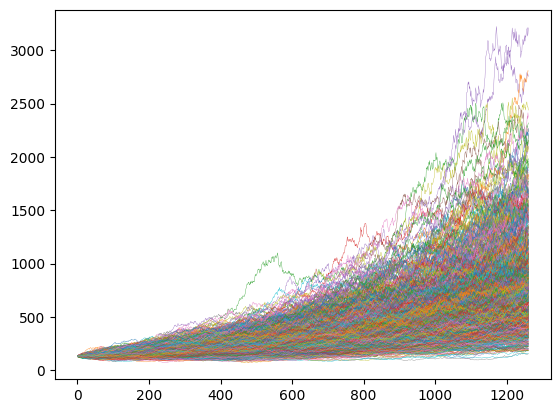

In [8]:
price_paths = gbm_levels(s0, delta, sigma, time, mu, paths)
plt.plot(price_paths, linewidth=0.25)
plt.show()